
<img src="fga.png" width="1200" height="400">


<h1><center>Aula 3 - Indicadores Técnicos Clássicos
</center></h1>

A presente atividade abordará um conjunto de indicadores técnicos adotados, regularmente, em estratégias de algo trading ou em operações manuais. Adicionamente, uma análise no domíno das frequência será apresentada, para o indicador média móvel, e um desenvolvimento para predição do retorno, por meio da regressão linear e indicadores técnicos.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>



<div id="Tópicos">
    <h2>Tópicos</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Aquisição do Preço">Aquisição de Sinais de Preço Bovespa</a></li>
        <li><a href="#CandleSticks">Formação do CandleSticks</a></li>
        <li><a href="#MM">Indicador Média Móvel (MM)</a></li>
        <li><a href="#MACD">Indicador Convergência e Divergência de Médias Móveis (MACD)</a></li>
        <li><a href="#RSI">Indicador Índice de Força Relativa (RSI)</a></li>
        <li><a href="#ATR">Indicador Média de Amplitude de Variação (ATR)</a></li>
        <li><a href="#Bollinger Bands">Indicador Bandas de Bollinger (BB)</a></li>
        <li><a href="#MMF">Indicador Média Móvel no Domíno das Frequências</a></li>
        <li><a href="#Regressão Linear">Modelagem Linear Multipla para Predição do Retorno</a></li>
</ol>
</div>




<p><b>Algumas Bibliotecas Python:</b></p>
<ul>
    <li> numpy (as np) </li>
    <li> matplotlib.pyplot (as plt) </li>
    <li> pandas </li>
    <li> seaborn (as sns) </li>
        <li> mpl_finance (as candlestick_ohlc) </li>
            <li> datetime </li>
                <li> pandas_datareader.data (as pdr)</li>
    <li> pickle</li>
     <li> datetime (as dt)</li>
      <li> signal (from scipy)</li>
</ul>


In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_finance import candlestick_ohlc
import datetime
import pandas_datareader.data as pdr
import pickle
import datetime as dt
from scipy import signal

<div id="Aquisição do Preço">
    <h2>1) Aquisição de Sinais de Preço Bovespa</h2>
</div>

<p>Conjunto de procedimentos baseada na biblioteca <b>pandas_datareader.data</b> e <b>Yahoo Finance</b> para aquisição de preços e volumes de ativos finaceiros operados nas principais bolsas de valores mundiais</p>
<h><a href="#Tópicos">^^Tópicos^^</a></h> 

In [2]:
N_months=4
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: Prof Marcelino Andrade
Universidade de Brasilia - UnB
"""

import matplotlib.dates as mdates
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt

sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo


Stocks=['ABCB4','RAIL3','WEGE3','RENT3','BIDI4','TRIS3','GSHP3']


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
#Stocks.append('^BVSP')


today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

stocks_close=stocks_all['Close'].dropna(axis=0, how='all')
stocks_close=stocks_close.dropna(axis=1, how='any')
stocks_open=stocks_all['Open'].dropna(axis=0, how='all')
stocks_open=stocks_open.dropna(axis=1, how='any')
stocks_high=stocks_all['High'].dropna(axis=0, how='all')
stocks_high=stocks_high.dropna(axis=1, how='any')
stocks_low=stocks_all['Low'].dropna(axis=0, how='all')
stocks_low=stocks_low.dropna(axis=1, how='any')

output = None

symbols=list(stocks_close.columns)

for sy in symbols:

    if output is None:
        df = pd.DataFrame(index=stocks_open.index)
        df['open']=stocks_open[sy]
        df['high']=stocks_high[sy]
        df['low']=stocks_low[sy]
        df['close']=stocks_close[sy]

        output = df          

    else:
        df = pd.DataFrame(index=stocks_open.index)
        df['open']=stocks_open[sy]
        df['high']=stocks_high[sy]
        df['low']=stocks_low[sy]
        df['close']=stocks_close[sy]

        
        output=pd.concat([output,df],axis=1) 

#output.reset_index(drop=True, inplace=True)
col1=[]
for sy in symbols:
    forall=[]
    for i in range(4):
        forall.append(sy)
    col1=col1+forall
col2=list(output.columns)

col = pd.MultiIndex.from_arrays([col1,col2])
data = pd.DataFrame(output.values, columns=col)

    
pickle_out = open("data.pickle","wb")
pickle.dump(data, pickle_out)
pickle_out.close() 

pickle_out = open("df.pickle","wb")
pickle.dump(df, pickle_out)
pickle_out.close() 

data[symbols].head()


[*********************100%***********************]  7 of 7 downloaded


ABCB4.SA                      BIDI4.SA                      GSHP3.SA        \
      open   high    low  close     open   high    low  close     open  high   
0    19.10  19.11  18.63  18.86    10.40  10.57  10.36  10.45     0.90  0.92   
1    18.89  18.91  18.28  18.63    10.48  10.54  10.23  10.44     0.85  0.92   
2    18.58  18.89  18.48  18.50    10.49  10.56  10.30  10.30     0.88  0.89   
3    18.56  18.57  18.10  18.39    10.31  10.46  10.05  10.11     0.84  0.84   
4    18.49  18.51  18.19  18.48    10.13  10.33   9.78   9.79     0.78  0.90   

   ... RENT3.SA        TRIS3.SA                   WEGE3.SA                \
   ...      low  close     open  high   low close     open   high    low   
0  ...    35.12  35.30     4.78  4.90  4.77  4.90    18.60  18.60  18.27   
1  ...    34.46  35.03     4.89  4.89  4.78  4.85    18.30  18.32  18.00   
2  ...    35.25  36.70     4.86  4.99  4.86  4.97    18.21  18.62  18.16   
3  ...    35.52  36.32     5.00  5.03  4.93  4.97    18.42  18.63  18.27   
4  ...    35.63  36.74     5.00  5.10  4.93  5.07    18.36  18.59  18.23   

          
   close  
0  18.36  
1  18.14  
2  18.61  
3  18.55  
4  18.43  

[5 rows x 28 columns]

<div id="CandleSticks">
    <h2>2) Formação do CandleSticks</h2>
</div>

No século XVIII os japoneses desenvolveram um método de análise técnica para analisar os preços de contratos futuros de arroz. O arroz era a riqueza e os fazendeiros de todo o Japão, podiam mandar sacas de arroz que eram mantidas em armazéns, em troca, recebiam um cupom representativo do valor, o qual poderia ser vendido a qualquer momento. Apenas na bolsa Dojima operavam cerca de 1300 traders de arroz. Candlestick é o nome ocidentalizado (em inglês), pelo qual esta técnica se tornou conhecida no mundo inteiro. Foi trazida ao ocidente pelo americano Steve Nison, investidor de Wall Street. Atribui-se a <b>Munehisa Honma</b> o maior desenvolvimento desta técnica de análise. Ele não via a necessidade de se fazer presente em Osaka, comunicava as intruções de compra e venda por mensageiros. Diz a lenda que conseguiu 100 trades consecutivos vitoriosos. De suas teorias evoluiram as técnicas de candlestick que hoje são utilizadas e pesquisadas em todo o mundo.


<figure> &emsp;




<img src="https://upload.wikimedia.org/wikipedia/commons/5/5e/Candlesaltaebaixa.JPG" width="500" height="500"
 />


</figure>
<b>Fontes:</b>
   

<ol> 
 
    
 
  <a href="https://pt.wikipedia.org/wiki/Candlestick">
  <li> <b>https://pt.wikipedia.org/wiki/Candlestick</b> </li>
    
 
    
    
  <a href="https://ninjatrader.com/blog/candlestick-charting-legend-of-munehisa-homma">
  <li> <b>Candlestick-charting-legend-of-munehisa-homma</b> </li>

</ol>
<h><a href="#Tópicos">^^Tópicos^^</a></h> 

No handles with labels found to put in legend.
/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


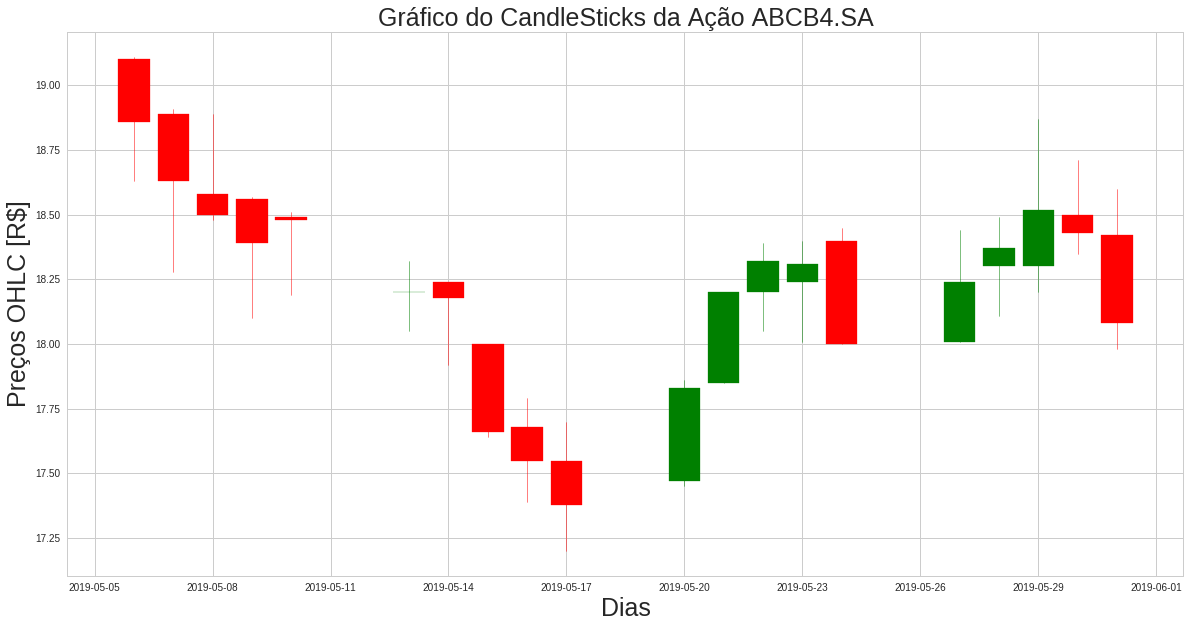

In [3]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas_datareader as web
from mpl_finance import candlestick_ohlc

pickle_in = open("data.pickle","rb")
data = pickle.load(pickle_in)

pickle_in = open("df.pickle","rb")
df = pickle.load(pickle_in)

df1 = pd.DataFrame(index=df.index)
df1['open']=data['ABCB4.SA'].open.values
df1['high']=data['ABCB4.SA'].high.values
df1['low']=data['ABCB4.SA'].low.values
df1['close']=data['ABCB4.SA'].close.values

df1.reset_index(inplace=True)
df1['Date'] = df1['Date'].map(mdates.date2num)

fig = plt.subplots(figsize=(20,10))

plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(111)
candlestick_ohlc(ax1, df1.values[:20], width=0.8, colorup='g', colordown='r',alpha=1)
ax1.legend(loc='upper left')
ax1.set_xlabel("Dias",fontsize=25)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=25)
ax1.set_title('Gráfico do CandleSticks da Ação '+'ABCB4.SA',fontsize=25) 
ax1.xaxis_date()


<div id="MM">
    <h2>3) Indicador Média Móvel (MM)</h2>
</div>

  

<p>Em processamento de sinais, a média móvel é um filtro FIR (Finite Impulse Response) passa-baixas, sendo as variações mais recorrentes a média móvel simples - SMA, exponencial - EMA e a ponderada - WMA</p>
    
  <p> Média Móvel simples $SMA[n]$ </p> &emsp;
  <li>$SMA[n]=\frac{1}{N}\sum_{k=n-N}^{n} p[k]$, onde $N$ é o periodo da SMA </li>
,
  <p> Média Móvel Exponencial $EMA[n]$ </p> &emsp;
  <li>$EMA[n]=\alpha p[n]+(1-\alpha) EMA[n-1]$, onde $N$ é o periodo da EMA </li>
  
  <p> Média Móveis $VWAP[n]$ </p> &emsp;
  <li>$VWAP[n]=\frac{\sum_{k=n-N}^{n} p[k]v[k]}{\sum_{k=n-N}^{n} v[k]}$, onde $N$ é o periodo da VWAP </li>

<h><a href="#Tópicos">^^Tópicos^^</a></h> 

Text(0.5,1,'Gráfico do Preço de Fechamento')

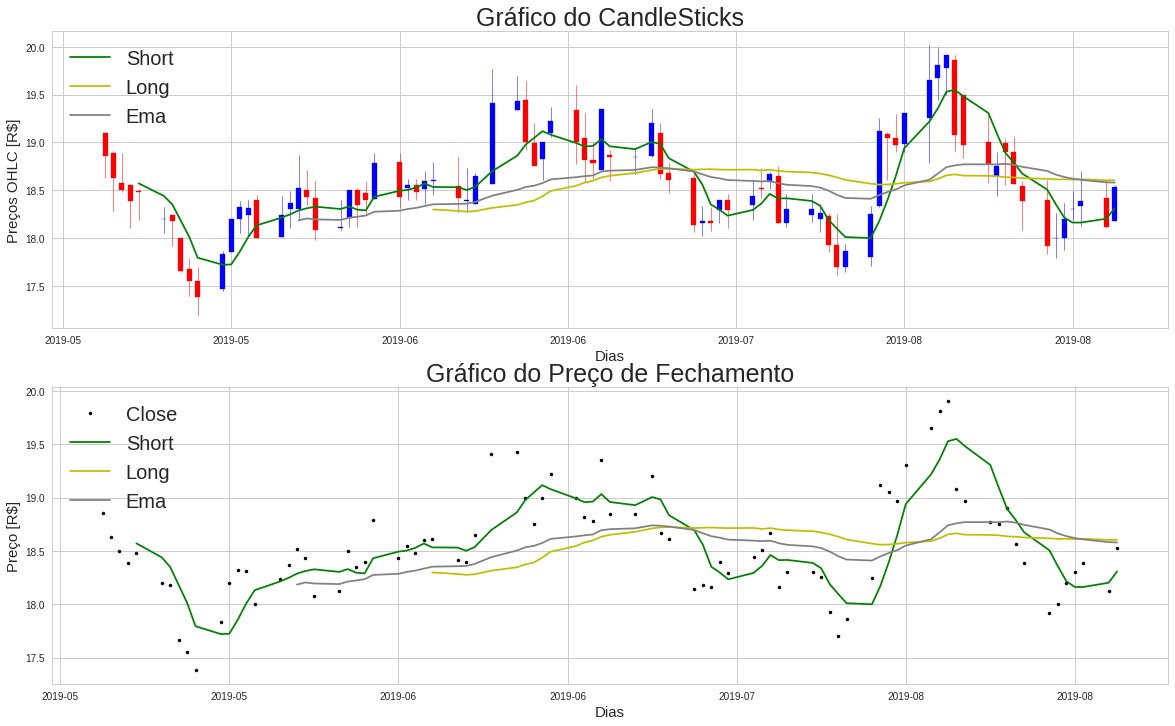

In [4]:
%matplotlib inline

def ema(data, period=0, column='close'):
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()    
    return data

mean_short=5
mean_long=30

close_mean_short = df1.close.rolling(window=mean_short).mean()
close_mean_long = df1.close.rolling(window=mean_long).mean()

fig = plt.subplots(figsize=(20,12))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r',alpha=1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.plot(df1['Date'], close_mean_short, color = 'green', label = 'Short')
ax1.plot(df1['Date'], close_mean_long, color = 'y', label = 'Long')
ax1.plot(df1['Date'], ema(df1,18)['ema18'], color = 'gray', label = 'Ema')
ax1.legend(loc='upper left',fontsize=20)

ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 

ax2 = plt.subplot(212)
#ax2.plot(df1['Date'], df1.close, 'k', label = 'Close')
ax2.plot(df1['Date'], df1.close, 'k.', label = 'Close')
ax2.plot(df1['Date'], close_mean_short, color = 'green', label = 'Short')
#ax2.plot(df1['Date'], close_mean_short,'.', color = 'green', label = 'Short')
ax2.plot(df1['Date'], close_mean_long, color = 'y', label = 'Long')
#ax2.plot(df1['Date'], close_mean_long,'.', color = 'y', label = 'Long')
ax2.plot(df1['Date'], ema(df1,18)['ema18'], color = 'gray', label = 'Ema')
#ax2.plot(df1['Date'], ema(df1,18)['ema18'],'.', color = 'gray', label = 'Long')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.legend(loc='upper left',fontsize=20)

ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Preço [R$]',fontsize=15)
ax2.set_title('Gráfico do Preço de Fechamento',fontsize=25) 

<div id="MACD">
    <h2>4) Indicador Convergência e Divergência de Médias Móveis (MACD)</h2>
</div>

 

Desenvolvido por <b> Gerald Appel </b> no final dos anos 70, o MACD (Moving Average Convergence / Divergence Oscillator) transforma dois seguidores de tendência, médias móveis, em um oscilador de momento, subtraindo a média móvel longa da curta. Assim, o MACD oferece um seguidor de tendências e momento. O MACD opera acima e abaixo da linha zero, à medida que as médias móveis convergem, cruzam e divergem. Normalmente, traders buscam cruzamentos de linha de sinal, cruzamentos de linha central e divergências para gerar sinais para suas operações. Porém, como o MACD não tem limites, superiores e inferiores, é de pouca ou nenhuma utilidade para identificar níveis de sobrecompra e sobrevenda.




  <p> Valor <b>MACD</b>  </p>&emsp;
  <li>$MACD = MME_{12}(close)-MME_{16}(close)$  </li>
 
   <p>Valor <b>Linha de Sinal</b> </p> &emsp;
   <li>$Sinal=MM_9(MACD)$</li> 
   
   <p>MACD <b>Histograma</b> </p>
   
   <li>$MACD_H=MACD-Sinal$</li> 

<b>Entradas da função: </b>  
<ol> 
  <li><b>data</b>: DataFrame com os preços </li> &emsp;
  <li><b>period_long</b>: periodo longo EMA (26 dias clássico) </li> &emsp;
  <li><b>period_short</b>: periodo curto EAM (12 dias clássico) </li> &emsp;
  <li><b>period_signal</b>: sinal de linha EMA (9 dias clássico)</li> &emsp;
  <li><b>column</b>: preço de fechamento (clássico)</li> &emsp;
</ol>
<b>Saídas da Função:</b>
<ol> 
  <li>DataFrame com os valores de <b>'macd_val'</b> e <b>'macd_signal_line'</b></li> &emsp;
</ol>
<b>Source:</b>
<ol> 

   <a href="http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:moving_average_convergence_divergence_macd">
  <li> <b>Technical_indicators:moving_average_convergence_divergence_macd</b> </li>
  <a href="https://github.com/voice32/stock_market_indicators/blob/master/indicators.py">
  <li> <b>github.com/voice32/stock_market_indicators/blob/master/indicators.py</b> </li>   
    
    
    
    
</ol>
<h><a href="#Tópicos">^^Tópicos^^</a></h> 

In [5]:
def ema(data, period=0, column='close'):
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()    
    return data

def macd(data, period_long=26, period_short=12, period_signal=9, column='close'):
    remove_cols = []
    if not 'ema' + str(period_long) in data.columns:
        data = ema(data, period_long)
        remove_cols.append('ema' + str(period_long))

    if not 'ema' + str(period_short) in data.columns:
        data = ema(data, period_short)
        remove_cols.append('ema' + str(period_short))

    data['macd_val'] = data['ema' + str(period_short)] - data['ema' + str(period_long)]
    data['macd_signal_line'] = data['macd_val'].ewm(ignore_na=False, min_periods=0, com=period_signal, adjust=True).mean()

    data = data.drop(remove_cols, axis=1)
        
    return data

No handles with labels found to put in legend.


        Date   open   high    low  close      ema18      ema26      ema12  \
80  737299.0  18.00  18.37  17.88  18.20  18.639431  18.630804  18.631734   
81  737300.0  18.30  18.49  18.19  18.30  18.621352  18.617971  18.606180   
82  737301.0  18.33  18.70  18.13  18.39  18.609037  18.609143  18.589529   
83  737304.0  18.42  18.61  18.12  18.12  18.583021  18.590232  18.553368   
84  737305.0  18.18  18.55  18.18  18.53  18.580202  18.587907  18.551568   

    macd_val  macd_signal_line  
80  0.000929          0.058201  
81 -0.011792          0.051185  
82 -0.019614          0.044089  
83 -0.036865          0.035977  
84 -0.036339          0.028733  


Text(0.5,1,'Indicador MACD')

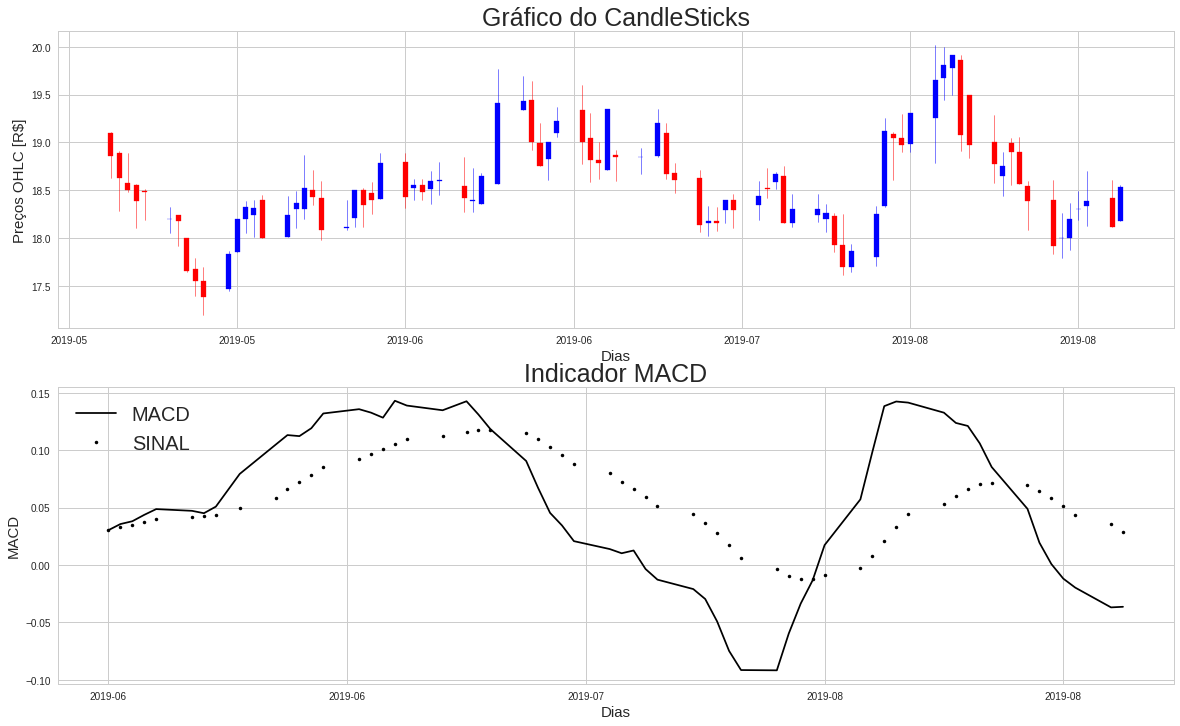

In [6]:
df_macd=df1.copy()
macd(df_macd)

print(df_macd.tail())
fig = plt.subplots(figsize=(20,12))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend(loc='upper left')
ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 

ax2 = plt.subplot(212)
ax2.plot(df_macd['Date'], df_macd.macd_val, 'k', label = 'MACD')
ax2.plot(df_macd['Date'], df_macd.macd_signal_line, 'k.', label = 'SINAL')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.legend(loc='upper left',fontsize=20)

ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('MACD',fontsize=15)
ax2.set_title('Indicador MACD',fontsize=25) 

<div id="RSI">
    <h2>5) Indicador Índice de Força Relativa (RSI)</h2>
</div>

  

O índice de força relativa foi desenvolvido por <b>J. Welles Wilder</b> e publicado em um livro de 1978, New Concepts in Technical Trading Systems, na edição de junho de 1978.
 O RSI é classificado como um oscilador de momento, medindo a velocidade e magnitude dos movimentos de preços direcionais. O RSI calcula a força da razão entre fechamento mais alto e fechamento mais baixo, localizando sua intensidade entre zero (sobrevendido) e um (sobrecomprado).


  


<b>Entradas da função: </b>  
<ol> 
  <li><b>data</b>: DataFrame com os preços </li> &emsp;
  <li><b>periods</b>: periodo para calculo do RSI (14 dias clássico) </li> &emsp;
</ol>
<b>Saída da Função:</b>
<ol> 
  <li>DataFrame com os valores do <b>'rsi'</b></li> &emsp;
</ol>
<b>Source:</b>
<ol> 
    

  <a href="https://github.com/voice32/stock_market_indicators/blob/master/indicators.py">
  <li> <b>github.com/voice32/stock_market_indicators/blob/master/indicators.py</b> </li>   
    
    
    

</ol>


<h><a href="#Tópicos">^^Tópicos^^</a></h> 

In [7]:
def rsi(data, periods=14, close_col='close'):
    data['rsi_u'] = 0.
    data['rsi_d'] = 0.
    data['rsi'] = 0.
    
    for index,row in data.iterrows():
        if index >= periods:
            
            prev_close = data.at[index-periods, close_col]
            if prev_close < row[close_col]:
                data.set_value(index, 'rsi_u', row[close_col] - prev_close)
            elif prev_close > row[close_col]:
                data.set_value(index, 'rsi_d', prev_close - row[close_col])
            
    data['rsi'] = data['rsi_u'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean() / (data['rsi_u'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean() + data['rsi_d'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean())
    
    data = data.drop(['rsi_u', 'rsi_d'], axis=1)
        
    return data

/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
No handles with labels found to put in legend.


        Date   open   high    low  close      ema18      ema26      ema12  \
80  737299.0  18.00  18.37  17.88  18.20  18.639431  18.630804  18.631734   
81  737300.0  18.30  18.49  18.19  18.30  18.621352  18.617971  18.606180   
82  737301.0  18.33  18.70  18.13  18.39  18.609037  18.609143  18.589529   
83  737304.0  18.42  18.61  18.12  18.12  18.583021  18.590232  18.553368   
84  737305.0  18.18  18.55  18.18  18.53  18.580202  18.587907  18.551568   

    macd_val  macd_signal_line  
80  0.000929          0.058201  
81 -0.011792          0.051185  
82 -0.019614          0.044089  
83 -0.036865          0.035977  
84 -0.036339          0.028733  


Text(0.5,1,'Indicador RSI [0-1]')

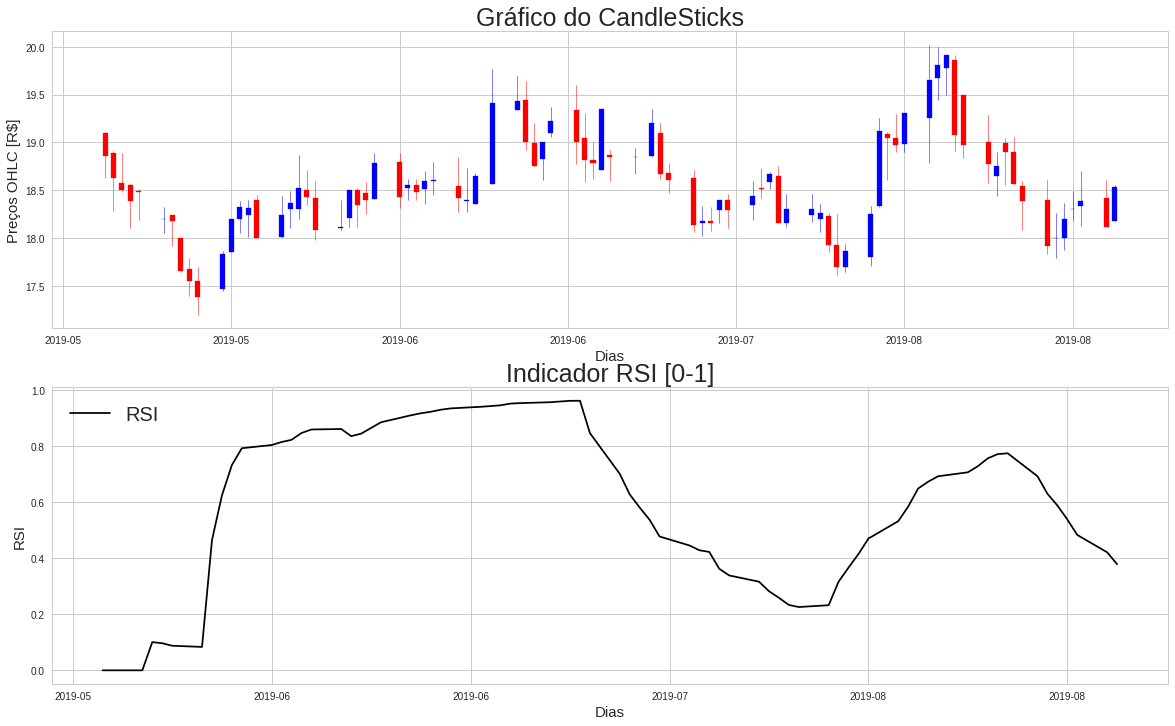

In [8]:
df_rsi=df1.copy()
rsi(df_rsi)

print(df_macd.tail())
fig = plt.subplots(figsize=(20,12))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend(loc='upper left')
ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 

ax2 = plt.subplot(212)
ax2.plot(df_rsi['Date'], df_rsi.rsi, 'k', label = 'RSI')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2.legend(loc='upper left',fontsize=20)

ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('RSI',fontsize=15)
ax2.set_title('Indicador RSI [0-1]',fontsize=25) 



<div id="ATR">
    <h2>6) Indicador Média de Amplitude de Variação (ATR)</h2>
</div>


O ATR é um indicador de volatilidade da análise técnica desenvolvido originalmente por <b>J. Welles Wilder, Jr</b>. para commodities. O indicador não fornece uma indicação da tendência dos preços, simplesmente o grau de volatilidade dos preços. 


  <p> O intervalo de negociação é definido  </p>&emsp;
<li>$TR = max[(high-low),abs(high-close_{prev}),abs(low-close_{prev})]$  </li>
 
  <p>O ATR no momento $t$ é calculado usando a seguinte fórmula </p> &emsp;
   <li>$ATR_t=\frac{ATR_{t-1}x(n-1)+TR_t}{n}$</li> 




 <p>O primeiro valor de ATR é calculado por</p> &emsp;
   <li>$ATR=\frac{1}{n}\sum_{i=1}^{n} TR_i$</li> &emsp; 

   <b>Entradas da função: </b>  


<ol> 
 
    
  <li><b>trend_periods</b>: período do ATR </li> &emsp;
  <li><b>open_col</b>: coluna do Preço OPEN</li> &emsp;
  <li><b>high_col</b>: coluna do Preço HIGH </li> &emsp;
  <li><b>low_col</b>: coluna do Preço LOW </li> &emsp;
  <li><b>close_col</b>: coluna do Preço CLOSE  </li> &emsp;
  <li><b>drop_tr</b>: salvar ou não 'true_range' no DataFrame </li> &emsp;

</ol>

<b>Saída da função:</b>
   

<ol> 
 
    
  <li>DataFrame com os valores do <b>'atr'</b></li> ou <b>'true_range'</b> (<b>'true_range'</b> se 'drop_tr' == True)</li> 


</ol>

<b>Fontes:</b>



  <a href="https://en.wikipedia.org/wiki/Average_true_range">
  <li> <b>wikipedia.org/wiki/Average_true_range</b> </li>   
    
  <a href="https://github.com/voice32/stock_market_indicators/blob/master/indicators.py">
  <li> <b>github.com/voice32/stock_market_indicators/blob/master/indicators.py</b> </li>   








<ol> 
 


<h><a href="#Tópicos">^^Tópicos^^</a></h> 


In [9]:
def average_true_range(data, trend_periods=14, open_col='open', high_col='high', low_col='low', close_col='close', drop_tr = True):
    for index, row in data.iterrows():
        prices = [row[high_col], row[low_col], row[close_col], row[open_col]]
        if index > 0:
            val1 = np.amax(prices) - np.amin(prices)
            val2 = abs(np.amax(prices) - data.at[index - 1, close_col])
            val3 = abs(np.amin(prices) - data.at[index - 1, close_col])
            true_range = np.amax([val1, val2, val3])

        else:
            true_range = np.amax(prices) - np.amin(prices)

        data.set_value(index, 'true_range', true_range)
    data['atr'] = data['true_range'].ewm(ignore_na=False, min_periods=0, com=trend_periods, adjust=True).mean()
    if drop_tr:
        data = data.drop(['true_range'], axis=1)
        
    return data

/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
No handles with labels found to put in legend.


        Date   open   high    low  close      ema18      ema26      ema12  \
80  737299.0  18.00  18.37  17.88  18.20  18.639431  18.630804  18.631734   
81  737300.0  18.30  18.49  18.19  18.30  18.621352  18.617971  18.606180   
82  737301.0  18.33  18.70  18.13  18.39  18.609037  18.609143  18.589529   
83  737304.0  18.42  18.61  18.12  18.12  18.583021  18.590232  18.553368   
84  737305.0  18.18  18.55  18.18  18.53  18.580202  18.587907  18.551568   

    macd_val  macd_signal_line  
80  0.000929          0.058201  
81 -0.011792          0.051185  
82 -0.019614          0.044089  
83 -0.036865          0.035977  
84 -0.036339          0.028733  


Text(0.5,1,'Indicador ATR')

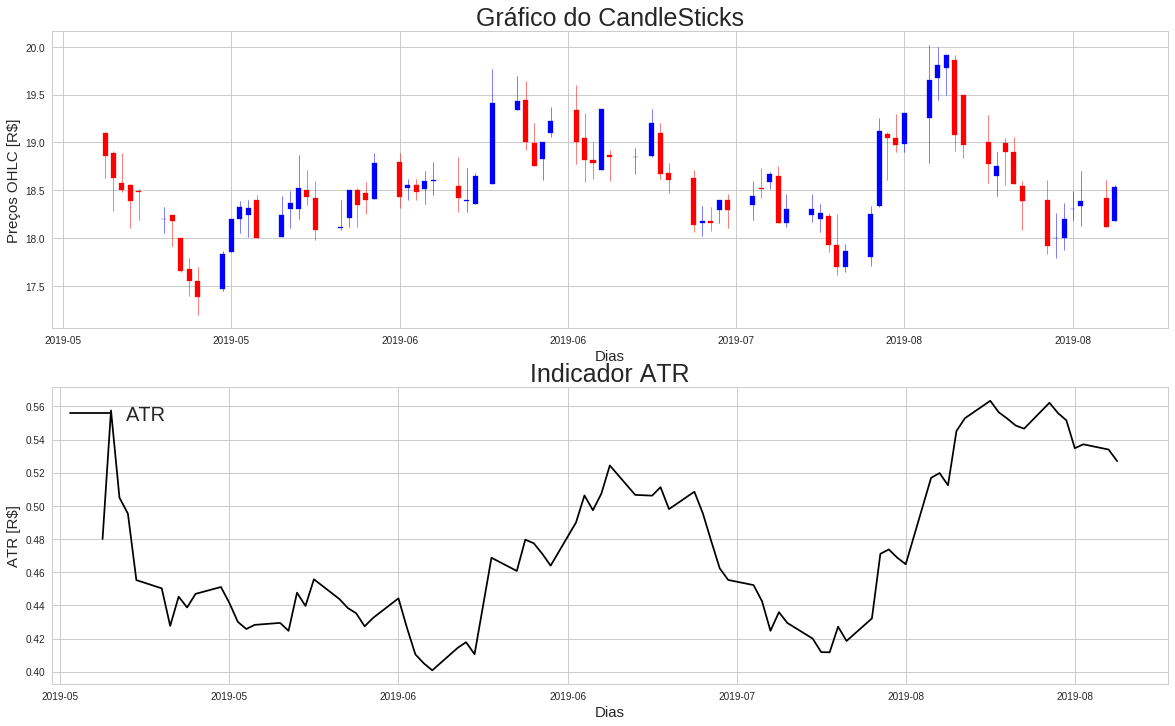

In [10]:
df_average_true_range=df1.copy()
average_true_range(df_average_true_range)

print(df_macd.tail())
fig = plt.subplots(figsize=(20,12))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend(loc='upper left')
ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 


ax2 = plt.subplot(212)
ax2.plot(df_average_true_range['Date'], df_average_true_range.atr, 'k', label = 'ATR')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2.legend(loc='upper left',fontsize=20)

ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('ATR [R$]',fontsize=15)
ax2.set_title('Indicador ATR',fontsize=25) 

<div id="Bollinger Bands">
    <h2>7) Indicador Bandas de Bollinger (BB)</h2>
</div>


   

<p>O indicador Bandas Bollinger foi criado por <b>John Bollinger</b> no início dos anos 80. Este indicador possui relação com a volatilidade ou o risco e permite sua comparação com os níveis de preços durante o período de tempo.</p>

  <p> Equações Básicas </p>&emsp;
 
  <li> $\mu = E\{p\}=\frac{1}{n}\sum_{i=1}^{n} p_i $  </li> &emsp;
  
  <li> $\sigma = (E\{p^2 \}-\mu^2)^{1/2}=\sqrt{\frac{1}{n}\sum_{i=1}^{n} (p_i-\mu)^2} $  </li> 
 
   <p>As <b>Bandas de Bollinger</b> são aplicações em janelas sucessivas de tamanho $n$ com</p> &emsp;
   <li>$upperband=\mu+2\sigma$</li>   
   
   <li>$lowerband=\mu-2\sigma$</li> 
   
   <li>$middleband=\mu$</li>    

<b>Entradas da função: </b>  
<ol> 
  <li><b>data</b>: DataFrame com os preços </li> &emsp;
  <li><b>trend_periods</b>: periodo da Bandas de Bollinger </li> &emsp;
    <li><b>deviation</b>: multiplicador do desvio padrão </li> &emsp;
  <li><b>close_col</b>: coluna do Preço CLOSE </li> &emsp;
 
</ol>
<b>Saídas da Função:</b>
<ol> 
  <li>DataFrame com os valores de <b>'bol_bands_middle'</b>, <b>'bol_bands_upper'</b> e <b>'bol_bands_lower'</b>&emsp;
</ol>
<b>Fonte:</b>
<ol> 

 <a href="https://github.com/voice32/stock_market_indicators/blob/master/indicators.py">
  <li> <b>github.com/voice32/stock_market_indicators/blob/master/indicators.py</b> </li>   


  
</ol>
<h><a href="#Tópicos">^^Tópicos^^</a></h> 




In [11]:
def bollinger_bands(data, trend_periods=20, deviation=2, close_col='close'):

    data['bol_bands_middle'] = data[close_col].ewm(ignore_na=False, min_periods=0, com=trend_periods, adjust=True).mean()
    for index, row in data.iterrows():

        s = data[close_col].iloc[index - trend_periods: index]
        sums = 0
        middle_band = data.at[index, 'bol_bands_middle']
        for e in s:
            sums += np.square(e - middle_band)

        std = np.sqrt(sums / trend_periods)
   #     d = 2
        upper_band = middle_band + (deviation * std)
        lower_band = middle_band - (deviation * std)

        data.set_value(index, 'bol_bands_upper', upper_band)
        data.set_value(index, 'bol_bands_lower', lower_band)

    return data

        Date   open   high    low  close      ema18  bol_bands_middle  \
80  737299.0  18.00  18.37  17.88  18.20  18.639431         18.638078   
81  737300.0  18.30  18.49  18.19  18.30  18.621352         18.621679   
82  737301.0  18.33  18.70  18.13  18.39  18.609037         18.610451   
83  737304.0  18.42  18.61  18.12  18.12  18.583021         18.586702   
84  737305.0  18.18  18.55  18.18  18.53  18.580202         18.583958   

    bol_bands_upper  bol_bands_lower  
80        19.942615        17.333541  
81        19.908871        17.334486  
82        19.844629        17.376273  
83        19.795624        17.377779  
84        19.803504        17.364413  


/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Text(0.5,1,'Indicador Bandas de Bollinger')

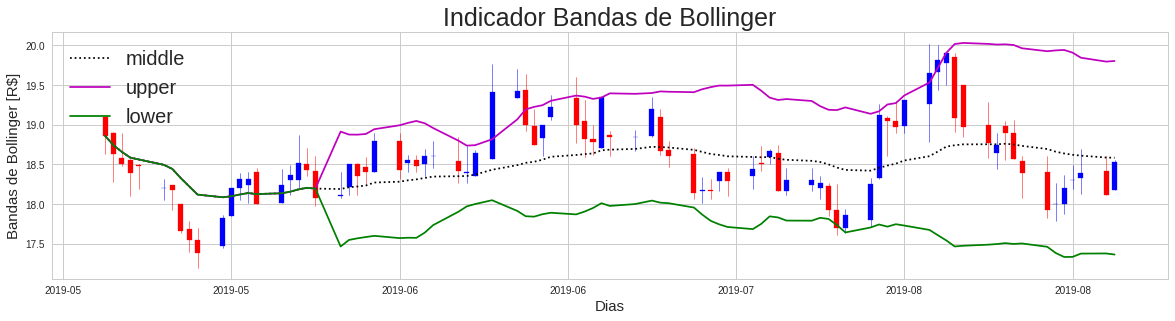

In [12]:
df_bollinger_bands=df1.copy()
bollinger_bands(df_bollinger_bands)

print(df_bollinger_bands.tail())
fig = plt.subplots(figsize=(20,10))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='b', colordown='r')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=15)
ax1.set_title('Gráfico do CandleSticks',fontsize=25) 


ax1.plot(df_bollinger_bands['Date'], df_bollinger_bands.bol_bands_middle, 'k:', label = 'middle')
ax1.plot(df_bollinger_bands['Date'], df_bollinger_bands.bol_bands_upper, 'm', label = 'upper')
ax1.plot(df_bollinger_bands['Date'], df_bollinger_bands.bol_bands_lower, 'g', label = 'lower')

ax1.legend(loc='upper left',fontsize=20)

ax1.set_xlabel("Dias",fontsize=15)
ax1.set_ylabel('Bandas de Bollinger [R$]',fontsize=15)
ax1.set_title('Indicador Bandas de Bollinger',fontsize=25) 

<div id="MMF">
    <h2>8) Indicador Média Móvel no Domíno das Frequências</h2>
</div>

<p>Representando a simple Moving Average (SMA) como um sistema Linear Discreto Invariante no Tempo [SLDIT]</p>&emsp;


 
  <li> $SMA[n]=h[n]*p[n]=\sum_{m=-\infty}^{\infty} h[m]p[n-m]$ </li> 
  
  <p>onde $*$ é a convolução e o $h[n]$ a resposta ao impulso unitário.</p>
  
  <li> $h[n] = \left \{ \begin{matrix} \frac{1}{N}, & \mbox{se }n, \mbox{ $0 \leq  n  \leq   N-1$} \\ 0, & \mbox{se }n, \mbox{ Caso contrário} \end{matrix} \right.$   </li> 
 
   <p>No domínio da Frequência, aplicando a transformada de Fourier em tempo discreto:</p> &emsp;
   <li>$H(e^{j\omega})=\mathscr{F}\{h[n]\}=\sum_{k=-\infty}^{\infty} h[n]e^{-j\omega n}$ </li>   
   
   <li>$H(e^{j\omega})=e^{-j\omega (N-1)/2}\frac{1}{N}\frac{\sin(N \omega /2)}{\sin(\omega /2)}$ </li> 
   
 

<p>Representação da Magnitude em Frequência da SNA </p>  

  <li>$\left|H(e^{j\omega})\right|=\frac{1}{N}\frac{\sin(N \omega /2)}{\sin(\omega /2)}$ </li> 
 
 <p>Complementarmente, representação da Magnitude em Frequência da EMA </p>
<li>$\left|H(e^{j\omega})\right|=\left|\frac{\alpha}{1-(1-\alpha)e^{-j\omega}}\right|$ </li>

<h><a href="#Tópicos">^^Tópicos^^</a></h> 




/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


Text(0.5,1,'Resposta em Frequencia dos Sinais de Médias Móveis Simples')

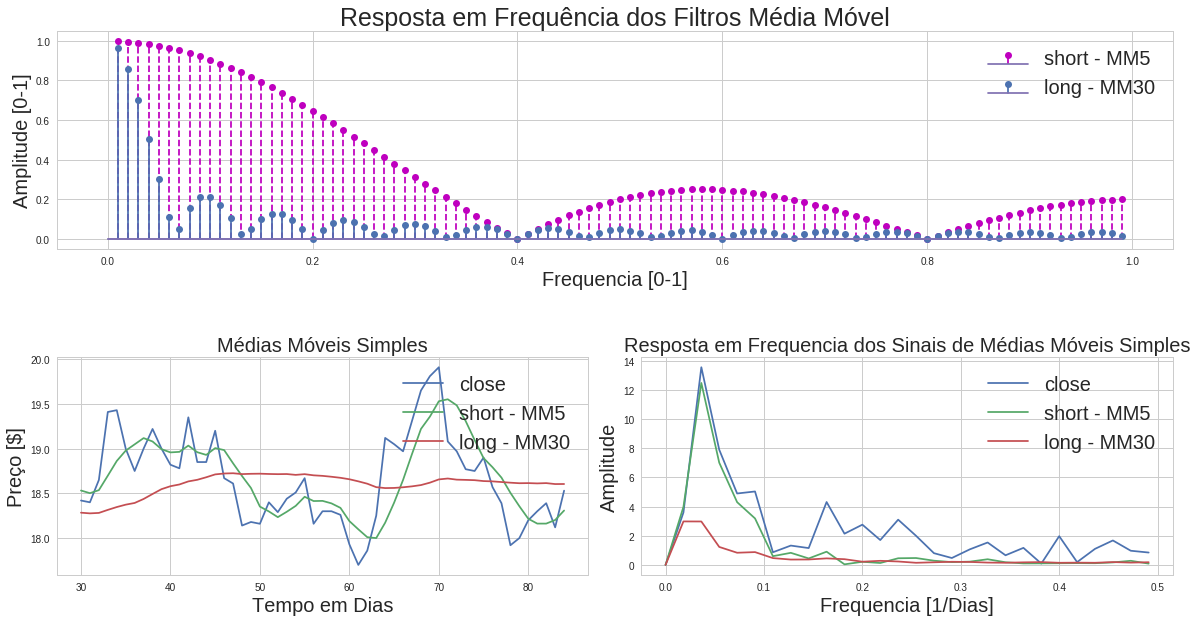

In [13]:
import math as mt  
def response_frequency(sinal,fs): 
        rf = np.abs(np.fft.fft(sinal))
        tp=np.arange(0,len(sinal)/fs,1/fs)
        fq = np.fft.fftfreq(tp.shape[-1])
        return fq, rf
 
omega=mt.pi*np.array(range(-100,100))/100

N1=5
SMA_short=np.exp(-1j*omega*(N1-1)/2)*(1/N1)*(np.sin(N1*omega/2)/np.sin(omega/2))
N2=30
SMA_long=np.exp(-1j*omega*(N2-1)/2)*(1/N2)*(np.sin(N2*omega/2)/np.sin(omega/2))

fig = plt.subplots(figsize=(20,10))
plt.subplots_adjust(wspace=.1, hspace=.5)

ax1=plt.subplot(2, 1, 1)  
ax1.stem(omega[int(-len(omega)/2):]/mt.pi, (abs(SMA_short[int(-len(omega)/2):])),linefmt='m--',markerfmt='mo', label='short - MM'+str(N1))
ax1.stem(omega[int(-len(omega)/2):]/mt.pi, (abs(SMA_long[int(-len(omega)/2):])), label='long - MM'+str(N2))
ax1.set_ylabel('Amplitude [0-1]',fontsize=20)
ax1.set_xlabel('Frequencia [0-1]',fontsize=20)
ax1.set_title('Resposta em Frequência dos Filtros Média Móvel',fontsize=25)
ax1.legend(loc='upper right',fontsize=20)

ax2=plt.subplot(2, 2, 3)  
close_mean_short = df1.close.rolling(window=mean_short).mean()
close_mean_long = df1.close.rolling(window=mean_long).mean()
ax2.plot(df1.close[N2:])
ax2.plot(close_mean_short[N2:],label='short - MM'+str(N1))
ax2.plot(close_mean_long[N2:],label='long - MM'+str(N2))
ax2.legend(loc='upper right',fontsize=20)

ax2.set_ylabel('Preço [$]',fontsize=20)
ax2.set_xlabel('Tempo em Dias',fontsize=20)
ax2.set_title('Médias Móveis Simples',fontsize=20)
ax3=plt.subplot(2, 2, 4)  

fs=1

fq, rf=response_frequency(df1.close[N2:]-df1.close[N2:].mean(),fs)
fq_short, rf_short=response_frequency(close_mean_short[N2:]-close_mean_short[N2:].mean(),fs)
fq_long, rf_long=response_frequency(close_mean_long[N2:]-close_mean_long[N2:].mean(),fs)

ax3.plot(fs*fq[:np.min(np.where(fq<0))],rf[:np.min(np.where(fq<0))],label='close')
ax3.plot(fs*fq_short[:np.min(np.where(fq_short<0))],rf_short[:np.min(np.where(fq_short<0))],label='short - MM'+str(N1))
ax3.plot(fs*fq_long[:np.min(np.where(fq_long<0))],rf_long[:np.min(np.where(fq_long<0))],label='long - MM'+str(N2))
ax3.legend(loc='upper right',fontsize=20)
ax3.set_ylabel('Amplitude',fontsize=20)
ax3.set_xlabel('Frequencia [1/Dias]',fontsize=20)
ax3.set_title('Resposta em Frequencia dos Sinais de Médias Móveis Simples',fontsize=20)

<div id="Regressão Linear">
    <h2>9) Modelagem Linear Multipla para Predição do Retorno</h2>
</div>

<p>A <b>Regressão Linear Múltipla</b> representa uma análise estatística que busca estimar o valor de uma variável dependente como função de outras variáveis independentes. Como abstração, temos uma regressão linear em um espaço de n-dimensões (n>2). A seguir uma forma de expressar essa relação:</p>&emsp;

<p> <li> ${\hat{y}}_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_px_{ip}+\varepsilon_i$</li> </p>&emsp;
 

  
  <p> Porém, a <b>Regressão Linear Múltipla</b> possuí premissas fundamentais que devem ser seguidas para um resultado coerente, exemplo:</p>&emsp;

  
   <li> Um relacionamento linear entre a variável dependente e seus preditores. </li> &emsp;
   <li> A variável dependente deve apresentar distribuição normal. </li>&emsp;
      <li> Termo do erro $(\varepsilon_i)$ sem correlação com a variável dependente. </li>&emsp;
         <li> Termo do erro $(\varepsilon_i)$ com distribuição normal e média zero. </li>&emsp;
            <li> Termo do erro $(\varepsilon_i)$ com homoscedásticidade. </li>&emsp;
                        <li> Os parâmetros populacionais são estacionários. </li>
&emsp;
  <p> Assim, considerando a natureza do preço e do retorno de um ativo, a <b> não linearidade e não estacionaridades </b> são inerentes. Portanto, a regressão linear apresenta sérias limitações no processo de predição. Contudo, é importante apresentá-la como modelo de entrada e de estudo referencial</p>&emsp;

<h><a href="#Tópicos">^^Tópicos^^</a></h> 

In [14]:
#geração do sinais
N_months=60

Stocks=['ABCB4','RAIL3','WEGE3','RENT3','BIDI4','TRIS3','GSHP3']


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
#Stocks.append('^BVSP')


today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)


df = pd.DataFrame(index=pd.DataFrame(stocks_all['Adj Close'].dropna(axis=0, how='all')['WEGE3.SA']).index)
df['adj close'] = pd.DataFrame(stocks_all['Adj Close'].dropna(axis=0, how='all')['WEGE3.SA']).values 
df['close'] = pd.DataFrame(stocks_all['Close'].dropna(axis=0, how='all')['WEGE3.SA']).values
df['open'] = pd.DataFrame(stocks_all['Open'].dropna(axis=0, how='all')['WEGE3.SA']).values
df['high'] = pd.DataFrame(stocks_all['High'].dropna(axis=0, how='all')['WEGE3.SA']).values
df['low'] = pd.DataFrame(stocks_all['Low'].dropna(axis=0, how='all')['WEGE3.SA']).values
df.reset_index(drop=True, inplace=True)

#indicadores
rsi(df,close_col='adj close')
macd(df,column='adj close')
average_true_range(df, close_col='adj close')


df=df[['adj close','rsi','ema26','ema12','macd_val','macd_signal_line','atr']]#.dropna()
df['5d_close'] = df['adj close'].shift(5)
df['5d_close_pct'] = df['adj close'].pct_change(5)
df['5d_future_close'] = df['adj close'].shift(-5)
df['5d_future_close_pct'] = df['5d_future_close'].pct_change(5)
df=df.dropna()
df.head(5)

[*********************100%***********************]  7 of 7 downloaded


/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,adj close,rsi,ema26,ema12,macd_val,macd_signal_line,atr,5d_close,5d_close_pct,5d_future_close,5d_future_close_pct
25,9.46,0.956928,10.945472,10.948924,0.003453,0.003453,1.483367,9.72,-0.026749,9.16,-0.031712
26,9.37,0.840557,10.928926,10.923806,-0.005120,-0.001059,1.485469,9.60,-0.023958,9.12,-0.026681
27,9.29,0.637511,10.909118,10.894213,-0.014905,-0.006169,1.476467,9.67,-0.039297,9.33,0.004306
28,9.16,0.483829,10.882445,10.854618,-0.027827,-0.012466,1.470572,9.63,-0.048806,9.29,0.014192
29,9.22,0.384514,10.861543,10.824622,-0.036922,-0.018438,1.465187,9.59,-0.038582,9.36,0.015184


In [15]:
feature_names =['macd_signal_line','adj close', '5d_close_pct','ema26','rsi']
features = df[feature_names]

targets = df['5d_future_close_pct']
feature_target_df = df[feature_names + ['5d_future_close_pct']]

feature_target_df.head()

,macd_signal_line,adj close,5d_close_pct,ema26,rsi,5d_future_close_pct
25,0.003453,9.46,-0.026749,10.945472,0.956928,-0.031712
26,-0.001059,9.37,-0.023958,10.928926,0.840557,-0.026681
27,-0.006169,9.29,-0.039297,10.909118,0.637511,0.004306
28,-0.012466,9.16,-0.048806,10.882445,0.483829,0.014192
29,-0.018438,9.22,-0.038582,10.861543,0.384514,0.015184


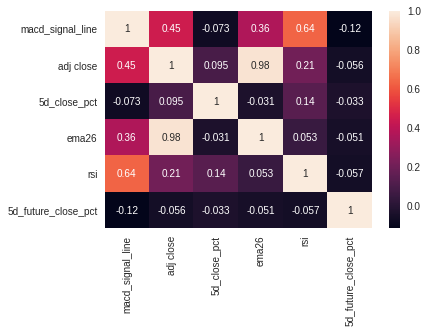

In [16]:
import seaborn as sns
corr = feature_target_df.corr()
sns.heatmap(corr, annot=True)

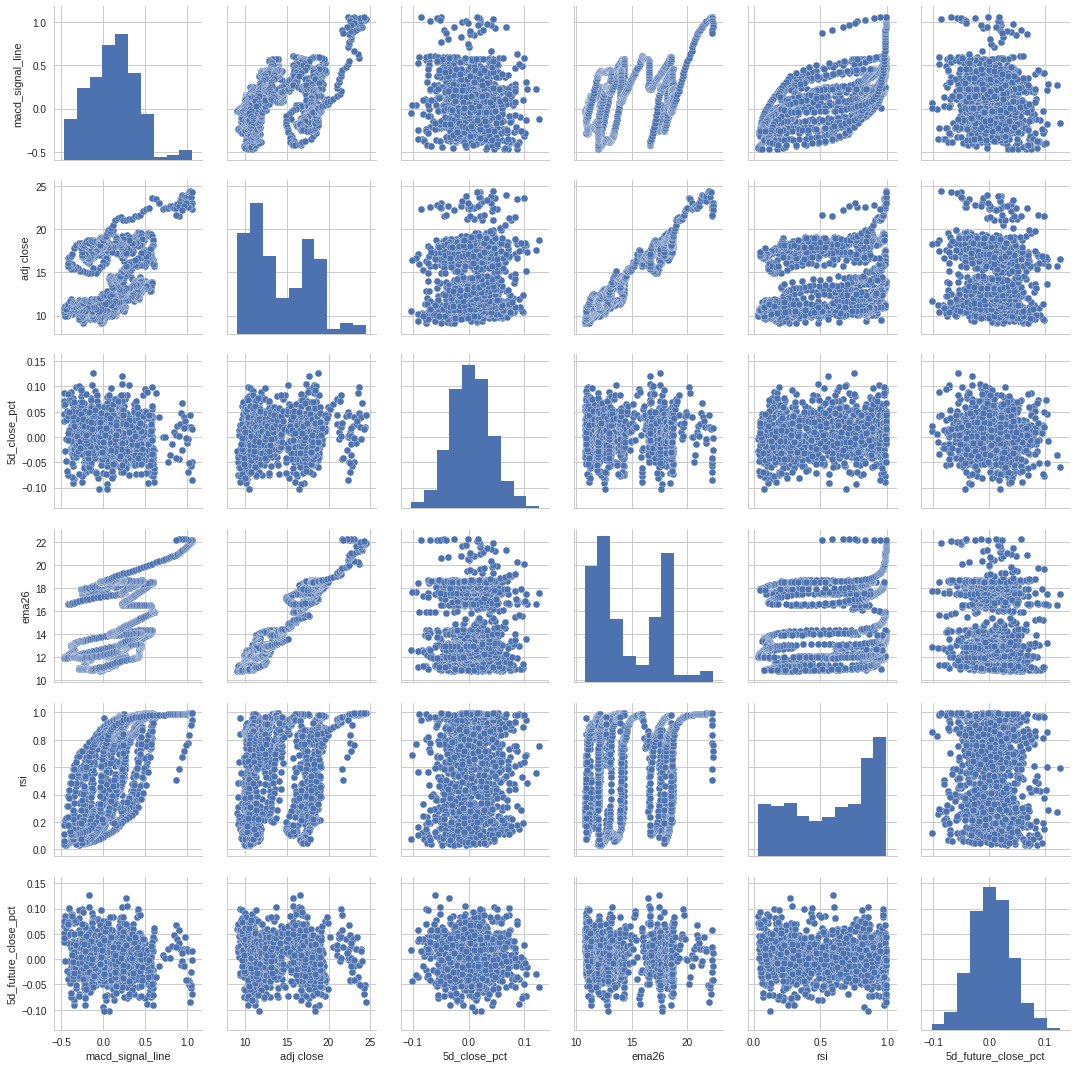

In [18]:
import seaborn as sns
sns.pairplot(feature_target_df)

In [19]:
# Importe a biblioteca statsmodels.api 
import statsmodels.api as sm

# Adicione uma constante aos recursos
linear_features = sm.add_constant(features)

# Conjunto de Treinamento (85%) e Teste (15%)
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(1213, 6) (1031, 6) (182, 6)


/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
# Criando o modelo linear e ajustando com mínimos quadrados
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model

# Predição com o modelo para conjuntos de teste e treinamento
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

# Resultados consolidados
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     5d_future_close_pct   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     4.211
Date:                 Wed, 04 Sep 2019   Prob (F-statistic):           0.000856
Time:                         16:58:32   Log-Likelihood:                 1960.8
No. Observations:                 1031   AIC:                            -3910.
Df Residuals:                     1025   BIC:                            -3880.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0262   

const               0.026685
macd_signal_line    0.005755
adj close           0.171457
5d_close_pct        0.053238
ema26               0.112849
rsi                 0.682086
dtype: float64

RESULTADO SEM UTILIDADE!!! R^2 e p-values revelam essa realidade


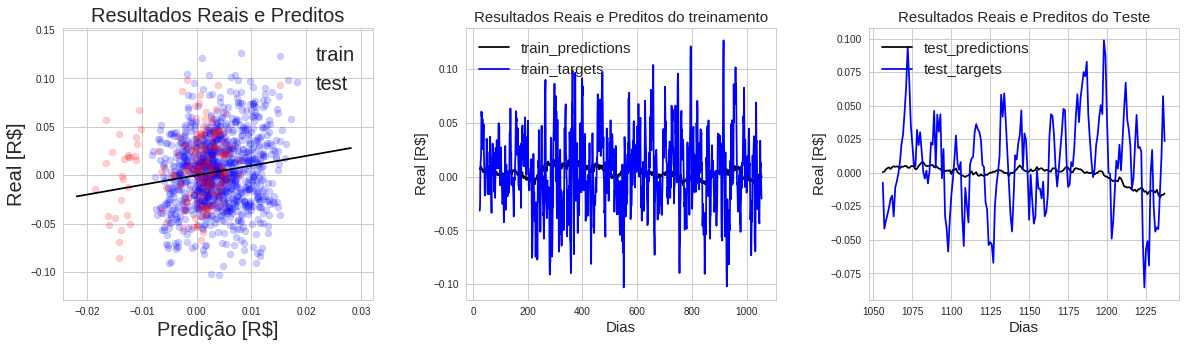

In [21]:

fig = plt.subplots(figsize=(20,5))
plt.subplots_adjust(wspace=.3, hspace=.5)

ax1=plt.subplot(1, 3, 1)  
ax1.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
ax1.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
ax1.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
ax1.legend(loc='upper right',fontsize=20)

ax1.set_ylabel('Real [R$]',fontsize=20)
ax1.set_xlabel('Predição [R$]',fontsize=20)
ax1.set_title('Resultados Reais e Preditos',fontsize=20)

ax2=plt.subplot(1, 3, 2)  
ax2.plot(train_predictions[0:1500], color='k', label='train_predictions')
ax2.plot(train_targets[0:1500],  color='b', label='train_targets')

ax2.set_ylabel('Real [R$]',fontsize=15)
ax2.set_xlabel('Dias',fontsize=15)
ax2.set_title('Resultados Reais e Preditos do treinamento',fontsize=15)
ax2.legend(loc='upper left',fontsize=15)

ax3=plt.subplot(1, 3, 3)  
ax3.plot(test_predictions, color='k', label='test_predictions')
ax3.plot(test_targets,  color='b', label='test_targets')
ax3.set_ylabel('Real [R$]',fontsize=15)
ax3.set_xlabel('Dias',fontsize=15)
ax3.set_title('Resultados Reais e Preditos do Teste',fontsize=15)
ax3.legend(loc='upper left',fontsize=15)

# pvalues
# Recursos com p <= 0,05 são normalmente considerados significativamente diferentes de 0
print(results.pvalues)
print()
print('RESULTADO SEM UTILIDADE!!! R^2 e p-values revelam essa realidade')

<b>Fim da Atividade!!!</b> 
